In [2]:
import numpy as np
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [3]:
file_path = r"C:\Users\dipak\OneDrive\desktop\github_ai\ml_with_python\three_module\Decision_Trees\drug200.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
177,25,M,NORMAL,HIGH,19.011,drugY
29,45,M,LOW,HIGH,17.951,drugY
15,16,F,HIGH,NORMAL,15.516,drugY
181,59,F,NORMAL,HIGH,13.884,drugX
10,47,F,LOW,HIGH,11.767,drugC


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [9]:
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["BP"] = label_encoder.fit_transform(df["BP"])
df["Cholesterol"] = label_encoder.fit_transform(df["Cholesterol"])

In [10]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# Check for the missing value in the dataset

In [13]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [14]:
m = sorted(list(df["Drug"].unique()))

In [15]:
custom_map = {}
for i in range(0,len(m)):
    custom_map[m[i]] = i

df["Drug_num"] = df["Drug"].map(custom_map)

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_num
0,23,0,0,0,25.355,drugY,4
1,47,1,1,0,13.093,drugC,2
2,47,1,1,0,10.114,drugC,2
3,28,0,2,0,7.798,drugX,3
4,61,0,1,0,18.043,drugY,4


In [24]:
df.corr(numeric_only=True)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_num
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug_num,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [25]:
df.corr(numeric_only=True)['Drug_num'].sort_values(ascending=False)

Drug_num       1.000000
Na_to_K        0.589120
BP             0.372868
Cholesterol    0.055629
Age           -0.004828
Sex           -0.098573
Name: Drug_num, dtype: float64

In [26]:
import seaborn as sns

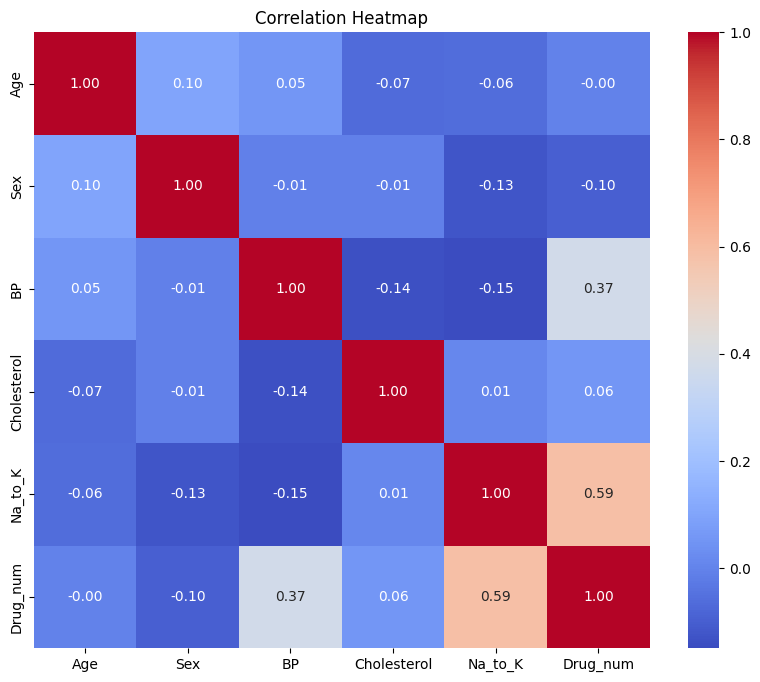

In [27]:
plt.figure(figsize=(10, 8))  # You can adjust the size
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [28]:
category_counts = df["Drug"].value_counts()

In [29]:
category_counts

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

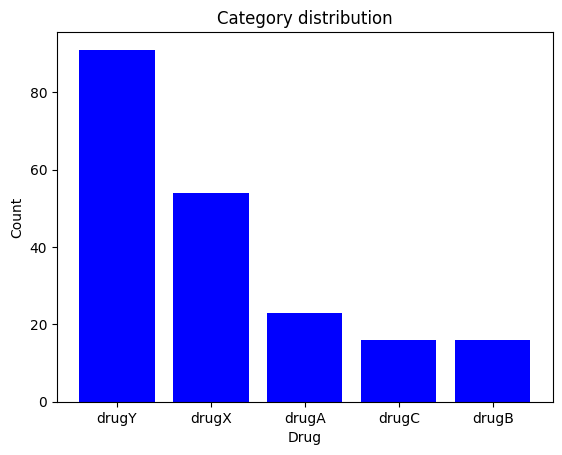

In [30]:
plt.bar(category_counts.index, category_counts.values, color="blue")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Category distribution")
plt.show()

In [34]:
y = df["Drug"]
X = df.drop(["Drug","Drug_num"],axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=32,test_size=0.3)

In [36]:
drug_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
drug_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)